##### Breast Cancer Analysis System


##### Importing libraries

In [1]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Importing our dataset

In [2]:
dataset = pd.read_csv("E:/Vs code/data.csv")
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# Keys in dataset
dataset.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
# Head of cancer dataset
dataset.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [7]:
# Tail of cancer dataset
dataset.tail(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
# Dimensions of dataset
print("Cancer dataset dimensions are:",format(dataset.shape))

Cancer dataset dimensions are: (569, 33)


In [7]:
# Information of cancer dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### Cleaning of Data

In [9]:
# Count the number of empty values in each column
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
dataset.isna().sum().sum()

569

In [11]:
# Drop the column with all missing values
new_dataset = dataset.dropna(axis=1)


In [12]:
new_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
new_dataset.drop(columns='id', inplace=True)

In [14]:
# New count on number of rows and columns
new_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
new_dataset.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [16]:
new_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Numerical distribution of data
print(new_dataset.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [18]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [19]:
# Finding the number of malignant and benign cases
print(new_dataset['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [22]:
col_max = new_dataset.max(axis=0)
col_max

diagnosis                        M
radius_mean                  28.11
texture_mean                 39.28
perimeter_mean               188.5
area_mean                   2501.0
smoothness_mean             0.1634
compactness_mean            0.3454
concavity_mean              0.4268
concave points_mean         0.2012
symmetry_mean                0.304
fractal_dimension_mean     0.09744
radius_se                    2.873
texture_se                   4.885
perimeter_se                 21.98
area_se                      542.2
smoothness_se              0.03113
compactness_se              0.1354
concavity_se                 0.396
concave points_se          0.05279
symmetry_se                0.07895
fractal_dimension_se       0.02984
radius_worst                 36.04
texture_worst                49.54
perimeter_worst              251.2
area_worst                  4254.0
smoothness_worst            0.2226
compactness_worst            1.058
concavity_worst              1.252
concave points_worst

In [24]:
col_min = new_dataset.min(axis=0)
col_min

diagnosis                         B
radius_mean                   6.981
texture_mean                   9.71
perimeter_mean                43.79
area_mean                     143.5
smoothness_mean             0.05263
compactness_mean            0.01938
concavity_mean                  0.0
concave points_mean             0.0
symmetry_mean                 0.106
fractal_dimension_mean      0.04996
radius_se                    0.1115
texture_se                   0.3602
perimeter_se                  0.757
area_se                       6.802
smoothness_se              0.001713
compactness_se             0.002252
concavity_se                    0.0
concave points_se               0.0
symmetry_se                0.007882
fractal_dimension_se       0.000895
radius_worst                   7.93
texture_worst                 12.02
perimeter_worst               50.41
area_worst                    185.2
smoothness_worst            0.07117
compactness_worst           0.02729
concavity_worst             

In [ ]:
col_max = new_dataset.max(axis=0)
col_max

##### Visualization of Data

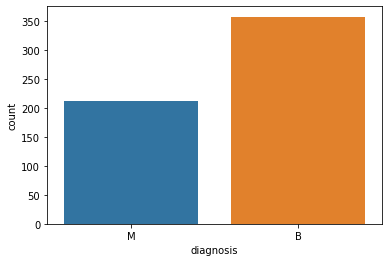

In [18]:
# Visualizing the number of Malignant and Benign Cases
sns.countplot(new_dataset['diagnosis'],label='count')
plt.show()

In [19]:
# Encode the categorical data
print("Actual value of diagnosis column:",format(new_dataset.iloc[:,0].values))
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
new_dataset.iloc[:,0] = labelencoder_Y.fit_transform(new_dataset.iloc[:,0])
print(new_dataset.iloc[:,0])

Actual value of diagnosis column: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 

In [20]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [21]:
new_dataset['diagnosis'] = new_dataset.diagnosis.astype(float)

In [22]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

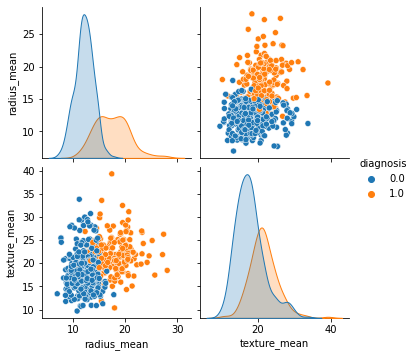

In [25]:
# Pairplotting the features with target values
sns.pairplot(new_dataset.iloc[:,0:3],hue='diagnosis')
plt.show()

In [26]:
# Get the correlation of the columns
new_dataset.iloc[:,1:11].corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


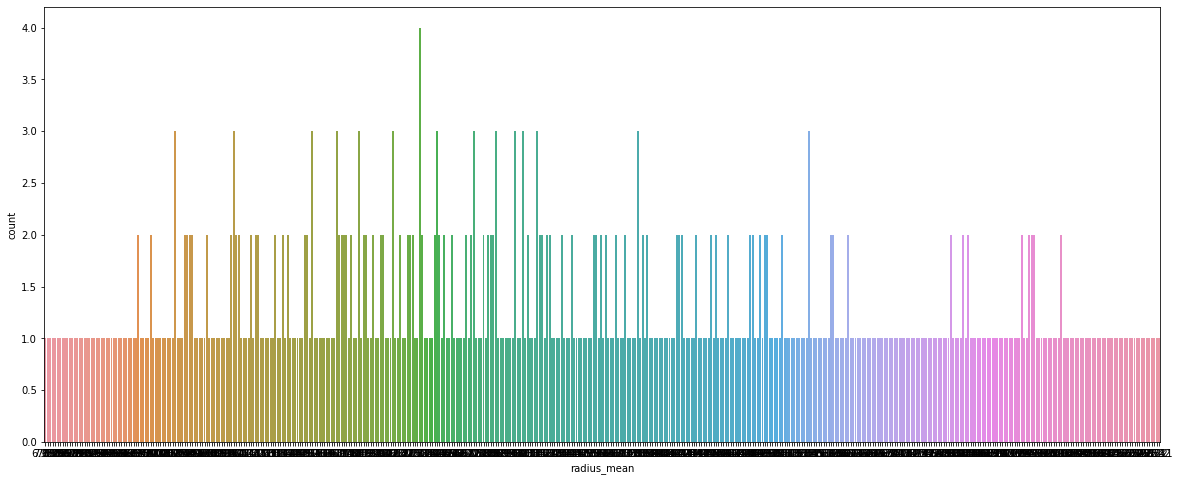

In [27]:
# counter plot of feature mean radius
plt.figure(figsize=(20,8))
sns.countplot(new_dataset['radius_mean'])
plt.show()

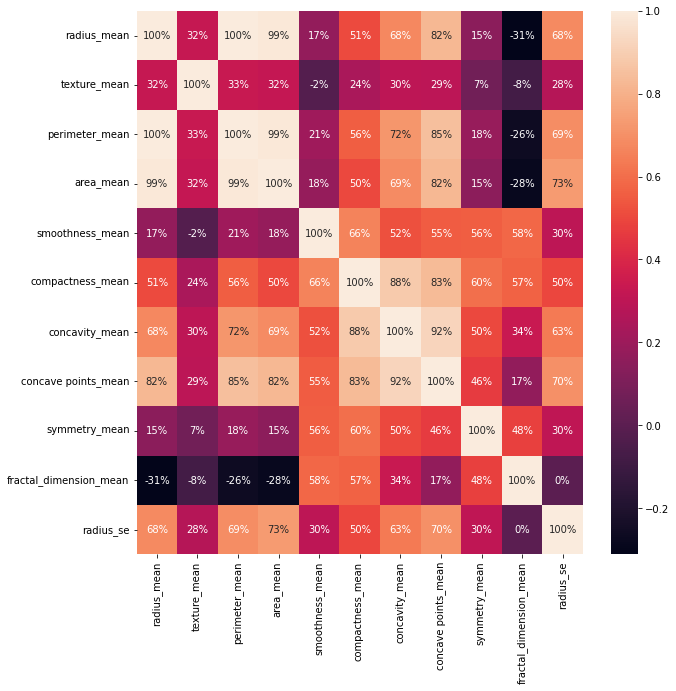

In [28]:
# Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(new_dataset.iloc[:,1:12].corr(),annot=True,fmt='.0%')
plt.show()

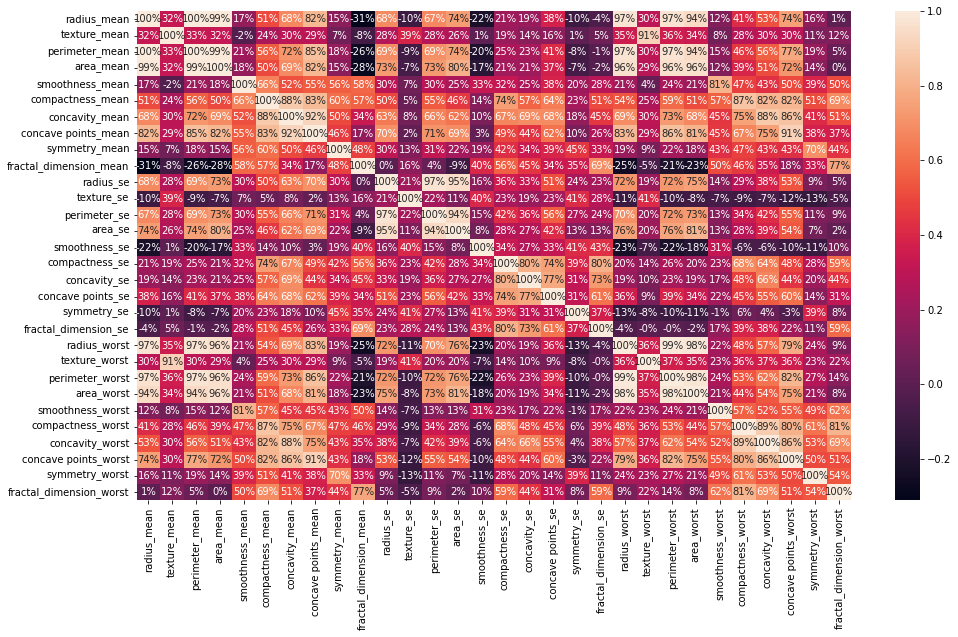

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(new_dataset.iloc[:,1:31].corr(),annot=True, fmt='.0%')
plt.show()

##### Split the dataset into Training and Testing

In [27]:
# Split the data set into independent(X) and dependent(Y) set
X = new_dataset.drop(['diagnosis'], axis=1)
X.head(6)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [25]:
Y = new_dataset['diagnosis']
Y.head(6)

0    M
1    M
2    M
3    M
4    M
5    M
Name: diagnosis, dtype: object

In [28]:
# Split the data set into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

##### Feature Scaling

In [29]:
# Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

##### Model Building

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

##### KNN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25, weights='uniform')
knn.fit(X_train,Y_train)
Y_predict_knn = knn.predict(X_test)
accuracy_score(Y_test,Y_predict_knn)

0.956140350877193

In [35]:
knn2 = KNeighborsClassifier(n_neighbors=25, weights='uniform')
knn2.fit(X_train_sc,Y_train)
Y_predict_knn_sc = knn2.predict(X_test_sc)
accuracy_score(Y_test,Y_predict_knn)

0.956140350877193

##### SV Classifier

In [31]:
from sklearn.svm import SVC
svc_classifier2 = SVC()
svc_classifier2.fit(X_train_sc,Y_train)
Y_predict_svc_sc = svc_classifier2.predict(X_test_sc)
accuracy_score(Y_test,Y_predict_svc_sc)


0.9473684210526315

In [32]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train,Y_train)
Y_predict_svc = svc_classifier.predict(X_test)
accuracy_score(Y_test,Y_predict_svc)


0.9385964912280702

##### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=51)
log_classifier.fit(X_train,Y_train)
Y_predict_log = log_classifier.predict(X_test)
accuracy_score(Y_test,Y_predict_log)

0.956140350877193

In [67]:
log_classifier2 = LogisticRegression(random_state=51)
log_classifier2.fit(X_train_sc,Y_train)
Y_predict_log_sc = log_classifier2.predict(X_test_sc)
accuracy_score(Y_test,Y_predict_log)

0.956140350877193

##### Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion='entropy',random_state=51)
tree_classifier.fit(X_train,Y_train)
Y_predict_tree = tree_classifier.predict(X_test)
accuracy_score(Y_test,Y_predict_tree)

0.9473684210526315

In [69]:
tree_classifier2 = DecisionTreeClassifier(criterion='entropy',random_state=51)
tree_classifier2.fit(X_train_sc,Y_train)
Y_predict_tree = tree_classifier2.predict(X_test_sc)
accuracy_score(Y_test,Y_predict_tree)

0.9385964912280702

##### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state=51)
forest_classifier.fit(X_train,Y_train)
Y_predict_forest = forest_classifier.predict(X_test)
accuracy_score(Y_test,Y_predict_forest)

0.9736842105263158

In [71]:
forest_classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state=51)
forest_classifier2.fit(X_train_sc,Y_train)
Y_predict_forest = forest_classifier2.predict(X_test_sc)
accuracy_score(Y_test,Y_predict_forest)

0.9649122807017544

##### Naive Bayes Classifier

In [72]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,Y_train)
Y_predict_nb = nb_classifier.predict(X_test)
accuracy_score(Y_test,Y_predict_nb)

0.9473684210526315

In [73]:
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_sc,Y_train)
Y_predict_nb = nb_classifier2.predict(X_test_sc)
accuracy_score(Y_test,Y_predict_nb)

0.9473684210526315

##### Confusion Matrix

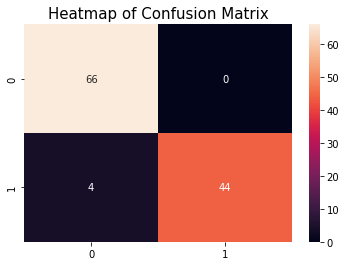

In [74]:
cm = confusion_matrix(Y_test,Y_predict_forest)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot=True)
plt.show()

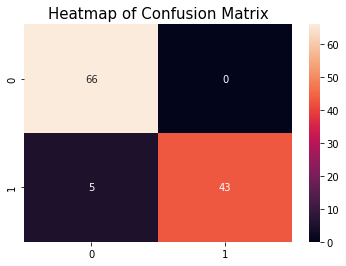

In [75]:
cm = confusion_matrix(Y_test,Y_predict_log)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot=True)
plt.show()

##### Classification Report

In [76]:
print(classification_report(Y_test,Y_predict_log))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        66
         1.0       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [77]:
print(classification_report(Y_test,Y_predict_forest))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        66
         1.0       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [34]:
print(classification_report(Y_test,Y_predict_svc))

              precision    recall  f1-score   support

           B       0.90      1.00      0.95        66
           M       1.00      0.85      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



##### Cross Validation of ML model

In [81]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator=forest_classifier,X= X_train, y= Y_train,cv=10)
print("Cross validation score of forest classifier is:",cross_validation)
print("Cross validation mean score of forest classifier is:",cross_validation.mean())

Cross validation score of forest classifier is: [1.         0.97826087 0.95652174 0.97826087 0.93478261 0.91111111
 1.         0.97777778 0.97777778 0.86666667]
Cross validation mean score of forest classifier is: 0.9581159420289855


In [80]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator=log_classifier,X= X_train, y= Y_train,cv=10)
print("Cross validation score of log classifier is:",cross_validation)
print("Cross validation mean score of log classifier is:",cross_validation.mean())

Cross validation score of log classifier is: [0.97826087 0.97826087 0.91304348 0.93478261 0.95652174 0.91111111
 0.93333333 0.97777778 0.91111111 0.8       ]
Cross validation mean score of log classifier is: 0.9294202898550725


In [33]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator=svc_classifier,X= X_train, y= Y_train,cv=10)
print("Cross validation score of svc classifier is:",cross_validation)
print("Cross validation mean score of svc classifier is:",cross_validation.mean())

Cross validation score of svc classifier is: [0.95652174 0.97826087 0.93478261 0.93478261 0.95652174 0.82222222
 0.91111111 0.95555556 0.86666667 0.8       ]
Cross validation mean score of svc classifier is: 0.9116425120772949


##### Save Select vector Classifier Model on pickle

In [83]:
import pickle

# save model
pickle.dump(forest_classifier, open('Breast_Cancer_Detector.pickle', 'wb'))

# load model
Breast_Cancer_Detector_Model = pickle.load(open('Breast_Cancer_Detector.pickle', 'rb'))

# predict the output
Y_pred = Breast_Cancer_Detector_Model.predict(X_test)

# confusion matrix
print('Confusion matrix of forest classifier model is:',confusion_matrix(Y_test, Y_pred),'\n')

# accuracy score
print('Accuracy of svc model is:',accuracy_score(Y_test, Y_pred),'\n')

Confusion matrix of forest classifier model is: [[66  0]
 [ 3 45]] 

Accuracy of svc model is: 0.9736842105263158 

